IMPORTS

In [7]:
!pip install opencv-python

In [20]:
!pip install dlib

  Using cached dlib-19.24.2-cp311-cp311-macosx_12_0_arm64.whl


In [22]:
!pip3 install imutils

  Using cached imutils-0.5.4.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25836 sha256=94532362c4399ef6ba696de9d14be02e72856ddd9a785c0d5f945f0b7812b15d
  Stored in directory: /Users/karanpreetsingh/Library/Caches/pip/wheels/31/d0/2c/87ce38f6052879e5b7b18f0f8b4a10ad2a9d210e908d449f16
Successfully built imutils


ADDING ALL LIBRARY IMPORTS REQUIRED

In [1]:
import cv2
import glob 
import dlib
import random
import numpy as np
from imutils import face_utils
from matplotlib import pyplot as plt

In [2]:
# Will take input once a GUI is made
input_image_path = "Images/my_image.jpg"
img = cv2.imread(input_image_path)

# TODO : Add a check for already existing name
#        For Storage Purposes
output_image_path = "Handled using Random for now"

img.shape

(1280, 960, 3)

Text(0.5, 1.0, 'Gray Image')

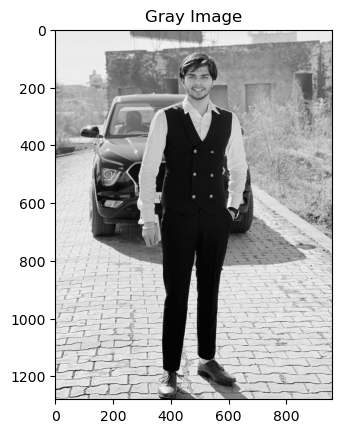

In [3]:
# Grayscale Conversion
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title("Gray Image")

Using pre-trained Haar Cascade classifier for face detection

In [4]:
# pre-trained face detection model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the grayscale image
# minSize : Face smaller than this will not be detected
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))


print("Bounding Boxes : ", faces.tolist())

Bounding Boxes :  [[439, 124, 112, 112]]


Code for detecting multiple faces

In [5]:
# # Save detected faces for now 
# # TODO : Remove this when cartoonize implemented
# #        Directly access from here


# for face in faces:
#     (x, y, w, h) = face
#     cropped_face = img[y:y+h, x:x+w]
    
#     # Save the cropped face
#     cv2.imwrite("face"+str(random.randint(0,10000))+".jpg", cropped_face)
    
# print(len(faces) , "Face(s) cropped and saved successfully.")


In [6]:
# For operating on a single face
factor = 10

if len(faces) > 0:
    (x, y, w, h) = faces[0]
    x, y = max(0, x-factor), max(0, y-factor)
    w += (2*factor)
    h += (2*factor)
    cropped_face = img[y:y+h, x:x+w]
    
    cv2.imwrite("Images/face"+str(random.randint(0,10000))+".jpg", cropped_face)
    print("Face cropped and saved successfully.")
else:
    print("No face detected in the input image.")

Face cropped and saved successfully.


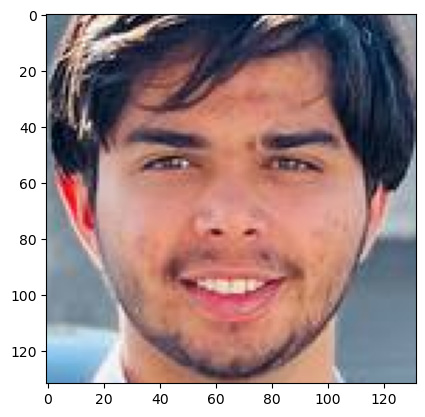

In [7]:
plt.imshow(cv2.cvtColor(cropped_face, cv2.COLOR_BGR2RGB))

# Facial Features Predictor

In [8]:
# instance of a pre-trained frontal face detector
# the facial landmark predictor

p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

In [12]:
# Run For testing purposes
# TEST : Not to be included for main project
# For Testing [Using Front Camera]

cap = cv2.VideoCapture(0)

while True:
    # load the input image and convert it to grayscale
    _, image = cap.read()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # detect faces in the grayscale image
    rects = detector(gray, 0)
    
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (255, 0, 0), -1) # (image, coordinate, size, color, -1:filled)
    
    # show the output image with the face detections + facial landmarks
    cv2.imshow("Output", image)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

error: OpenCV(4.8.1) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [10]:
# For Image

image = cropped_face
 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
# detect faces in the grayscale image
rects = detector(gray, 0)
rects

rectangles[[(26, 35) (112, 121)]]

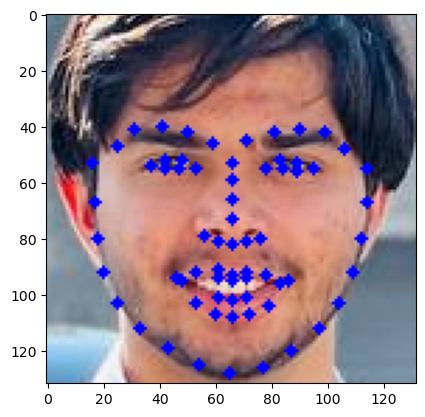

In [11]:
    
# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region
        # return 68 values that are 68 face landmarks
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (255, 0, 0), -1)

    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))